In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
orders = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_orders_dataset.csv')
customers = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_customers_dataset.csv')
products_translations = pd.read_csv(
    '/Users/aishwaryakurnutala/Downloads/olistdata/product_category_name_translation.csv')
products = pd.read_csv("/Users/aishwaryakurnutala/Downloads/olistdata/olist_products_dataset.csv")
order_items = pd.read_csv("/Users/aishwaryakurnutala/Downloads/olistdata/olist_order_items_dataset.csv")
payments = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_order_payments_dataset.csv')

In [3]:
#merging the data to get the product categories
products_merged = customers.merge(orders, on='customer_id', how='left')
products_merged = orders.merge(order_items, on='order_id', how='left')
products_merged = products_merged.merge(payments, on='order_id', how='left')
products_merged = products_merged.merge(products, on='product_id', how='left')
products_merged = products_merged.merge(products_translations, on='product_category_name', how='left')
products_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [4]:
#considering only the required attributes
products_merged = products_merged[
    ['order_id', 'product_id', 'customer_id', 'product_category_name_english', 'payment_value', 'order_item_id']]

In [5]:
#checking for null values
products_merged.isna().sum()

order_id                            0
product_id                        830
customer_id                         0
product_category_name_english    2553
payment_value                       3
order_item_id                     830
dtype: int64

In [6]:
#replacing the null values with Unknown in product_category_name_english
products_merged['product_category_name_english'] = products_merged['product_category_name_english'].fillna('Unknown')

### Top 10 Product Categories Generating the Most Revenue

In [9]:
#Getting the top 10 categories using payment value
Top_10Categories = products_merged.groupby(products_merged['product_category_name_english'])[
    'payment_value'].sum().reset_index().sort_values('payment_value', ascending=False)
Top_10Categories = Top_10Categories[:10]
Top_10Categories.head()


,product_category_name_english,payment_value
8,bed_bath_table,1712553.67
44,health_beauty,1657373.12
16,computers_accessories,1585330.45
40,furniture_decor,1430176.39
71,watches_gifts,1429216.68


In [10]:
labels = Top_10Categories["product_category_name_english"].tolist()
labels

['bed_bath_table',
 'health_beauty',
 'computers_accessories',
 'furniture_decor',
 'watches_gifts',
 'sports_leisure',
 'housewares',
 'auto',
 'garden_tools',
 'cool_stuff']

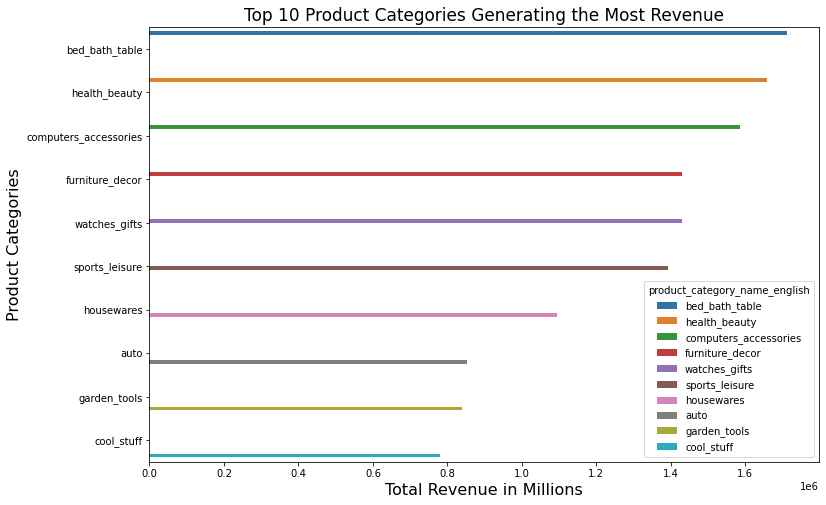

In [16]:
# Plotting the Top 10 categories
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='payment_value', y='product_category_name_english', data=Top_10Categories,
                 hue='product_category_name_english')
ax.set_title("Top 10 Product Categories Generating the Most Revenue", fontsize=17)
ax.set_xlabel("Total Revenue in Millions", fontsize=16)
ax.set_ylabel("Product Categories", fontsize=16)
plt.show()